## precipitation extremes - one model, example

Precipitaiton extremes can be defined in many ways
Here we explore precipitation extremes from the perspective of 

extremes for individual gridboxes (rx1day, rx5day) for time period, averaged over the domain
(rx1day - maximum daily precipitation rate for each gridbox over a time period)
(rx5day - maximum 5 day rolling average precipitation rate for each gridbox over a time period)

extremes for the domain as a whole (high percentile daily precipitation rate) averaged over a time period


the metrics focus on annual extremes, averaged over the total time period
However, we also explore seasonal, and monthly metrics 

In [1]:
import xarray as xr
import numpy as np
import skimage.measure as skm
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from os.path import expanduser
home = expanduser("~")

from cmip5_metrics.funcs.vars.myFuncs import *
from cmip5_metrics.funcs.vars.myPlots import *
from cmip5_metrics.funcs.prFuncs import *
from cmip5_metrics.funcs.aggFuncs import *
#import constructed_fields

import timeit

switch = {
    'local_files': True, 
    'nci_files': False, 
    'constructed_fields': False
}

### precipitation

In [2]:
models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 # cannot concatanate files for rcp85 run
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
model = models[0]


experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]       



if switch['local_files']:
    folder = home + '/Documents/data/cmip5/' + model
    fileName = model + '_precip_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    precip = ds.precip*60*60*24
    precip.attrs['units']= 'mm/day'

if switch['nci_files']:
    precip = get_pr(model, experiment).precip # from prVars

# if switch['constructed_fields']:
#     precip = constructed_fields.precip_fields

In [3]:
precip

<xarray.DataArray 'precip' (time: 10950, lat: 22, lon: 128)>
array([[[4.08858657e-01, 3.12826395e-01, 2.66478002e-01, ...,
         7.82788754e-01, 5.55889487e-01, 4.91493523e-01],
        [4.22117233e-01, 2.40650624e-01, 1.58740297e-01, ...,
         8.07168961e-01, 5.85888326e-01, 5.24520874e-01],
        [2.71370828e-01, 1.18661821e-01, 6.75984770e-02, ...,
         4.74144459e-01, 4.24919963e-01, 4.05480087e-01],
        ...,
        [1.90939274e-04, 2.30353166e-04, 4.63937467e-05, ...,
         0.00000000e+00, 2.78055512e-09, 2.02344672e-05],
        [1.62480981e-04, 5.49919961e-04, 2.26543372e-04, ...,
         4.59178806e-11, 3.44704154e-10, 2.20209113e-05],
        [1.87449245e-04, 8.20199493e-05, 4.61850832e-05, ...,
         4.66769282e-03, 5.29152434e-03, 3.79748479e-03]],

       [[5.20864546e-01, 5.28695166e-01, 4.83805656e-01, ...,
         5.20202994e-01, 4.44190621e-01, 4.29574966e-01],
        [4.38689321e-01, 4.05646205e-01, 2.81971216e-01, ...,
         4.92263496e-01, 3.51503998e-01, 3.77124488e-01],
        [5.00151277e-01, 4.25230354e-01, 1.98965132e-01, ...,
         4.04337049e-01, 3.45240235e-01, 4.43055809e-01],
...
        [5.59766899e-09, 2.99688229e-32, 0.00000000e+00, ...,
         2.86355467e-10, 7.04136927e-09, 1.71255028e-08],
        [4.88535523e-09, 1.17072363e-09, 8.21280643e-09, ...,
         5.12836152e-07, 5.82156972e-08, 3.00863725e-08],
        [1.89105576e-05, 2.66464149e-08, 4.29197513e-08, ...,
         2.21278742e-02, 2.44675390e-02, 2.96266121e-03]],

       [[2.66608298e-01, 2.07568243e-01, 2.14525402e-01, ...,
         1.79786175e-01, 2.77063102e-01, 3.14550877e-01],
        [3.14109057e-01, 3.18816870e-01, 2.46779546e-01, ...,
         3.24843109e-01, 3.32155108e-01, 2.67388195e-01],
        [4.73636806e-01, 4.05086994e-01, 3.10137302e-01, ...,
         2.16585651e-01, 3.06336045e-01, 4.47086453e-01],
        ...,
        [1.05024958e-02, 5.50237438e-03, 3.46267416e-06, ...,
         1.23978796e-04, 9.12268995e-04, 3.50002619e-03],
        [8.40858263e-07, 4.97356996e-06, 1.98428370e-06, ...,
         3.36105913e-05, 9.05447791e-07, 2.45206934e-07],
        [6.08904869e-04, 9.31636605e-05, 4.13278076e-06, ...,
         7.81251043e-02, 1.14151299e-01, 3.18472683e-02]]], dtype=float32)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    units:    mm/day

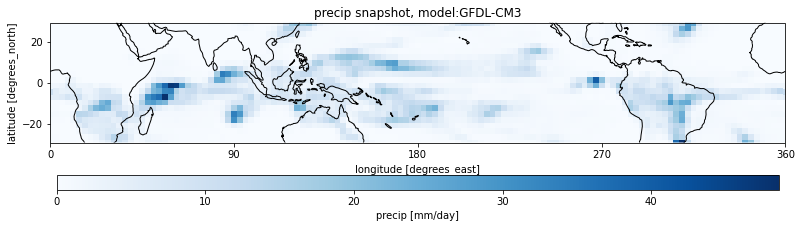

In [4]:
plot_snapshot(precip.isel(time=0), 'Blues', 'precip', model) # from vars.myPlots

### Rx1day, Rx5day

#### Annual basis

In [8]:
start = timeit.default_timer()
rxday = calc_rxday(precip) # from prFuncs
stop = timeit.default_timer()
print('it takes {} seconds to calculate rx1day and rx5day for model: {}'.format((stop-start)/60, model))

it takes 0.005739140283333436 seconds to calculate rx1day and rx5day for model: GFDL-CM3


In [9]:
rxday

<xarray.Dataset>
Dimensions:  (time: 30, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-12-31 00:00:00 ... 1999-12-31 00:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    rx1day   (time, lat, lon) float32 9.972 13.62 9.293 ... 8.492 3.344 5.649
    rx5day   (time, lat, lon) float32 4.349 4.201 3.037 ... 2.593 1.927 3.121

In [ ]:
# rxday.rx1day.plot(col = 'time', col_wrap=5, figsize = (30,20))

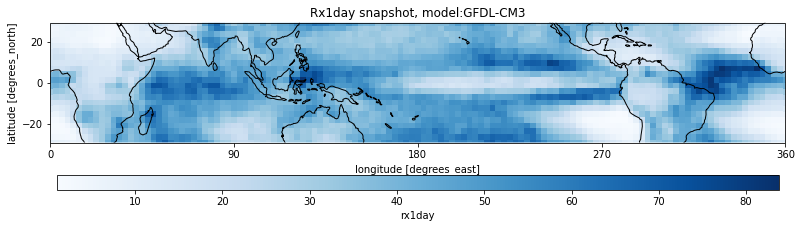

In [15]:
plot_snapshot(rxday.rx1day.mean(dim='time'), 'Blues', 'Rx1day', model)

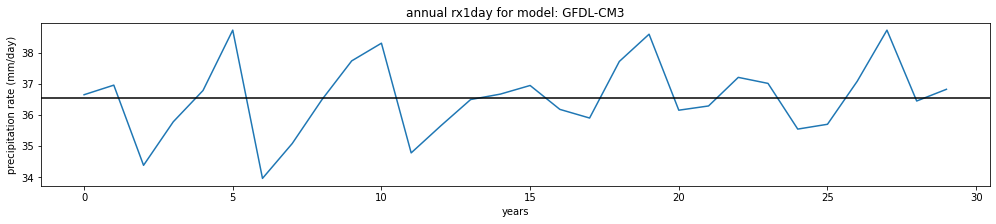

In [36]:
plt.figure(figsize= (17,3))
plt.plot(rxday.rx1day.weighted(np.cos(np.deg2rad(precip.lat))).mean(dim=('lat','lon')))
plt.title('annual rx1day for model: ' + model)
plt.ylabel('precipitation rate (mm/day)')
plt.xlabel('years')
plt.xlabel('years')
plt.axhline(y=rxday.rx1day.weighted(np.cos(np.deg2rad(precip.lat))).mean(dim=('time','lat','lon')), color='k')

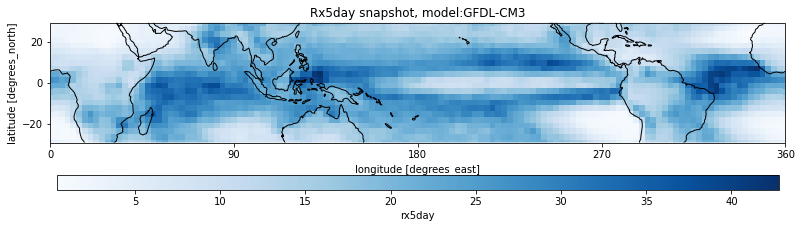

In [17]:
plot_snapshot(rxday.rx5day.mean(dim='time'), 'Blues', 'Rx5day', model)

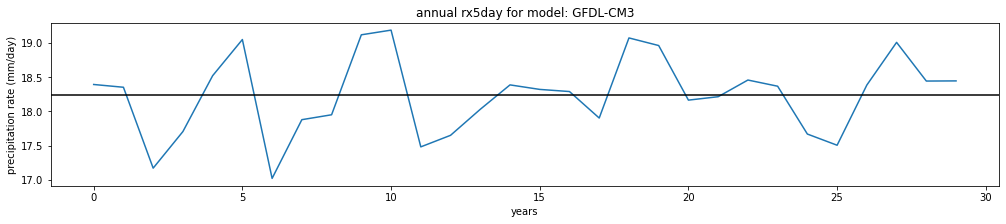

In [37]:
plt.figure(figsize= (17,3))
plt.plot(rxday.rx5day.weighted(np.cos(np.deg2rad(precip.lat))).mean(dim=('lat','lon')))
plt.title('annual rx5day for model: ' + model)
plt.ylabel('precipitation rate (mm/day)')
plt.xlabel('years')
plt.axhline(y=rxday.rx5day.weighted(np.cos(np.deg2rad(precip.lat))).mean(dim=('time','lat','lon')), color='k')

#### seasonal basis

#### monthly basis

### high percentile precipitation rate

In [39]:
start = timeit.default_timer()
pr_percentiles = calc_pr_percentiles(precip) # from prFuncs
stop = timeit.default_timer()
print('it takes {} seconds to calculate extreme percentiles for model: {}'.format((stop-start)/60, model))

it takes 0.036158630566668154 seconds to calculate extreme percentiles for model: GFDL-CM3


In [40]:
pr_percentiles

<xarray.Dataset>
Dimensions:  (time: 10950)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Data variables:
    pr95     (time) float64 14.08 13.81 14.17 14.02 ... 16.82 16.76 16.91 15.32
    pr97     (time) float64 17.44 17.1 17.44 17.31 ... 20.42 21.26 21.76 19.81
    pr99     (time) float64 25.16 28.12 26.33 25.34 ... 25.66 29.67 33.37 31.73
    pr999    (time) float64 46.43 56.0 75.17 68.38 ... 41.02 47.47 67.33 72.96

In [66]:
pr_percentile = pr_percentiles.pr99

#### annual basis

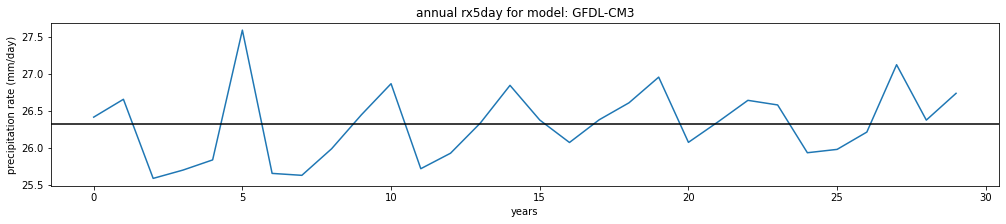

In [41]:
plt.figure(figsize= (17,3))
plt.plot(pr_percentile.resample(time='Y').mean(dim='time'))
plt.title('annual rx5day for model: ' + model)
plt.ylabel('precipitation rate (mm/day)')
plt.xlabel('years')
plt.axhline(y=pr_percentile.resample(time='Y').mean(dim='time').mean(dim='time'), color='k')

#### seasonal

In [67]:
pr_percentileSeason = pr_percentile.groupby('time.season').mean(dim='time')
pr_percentileSeason

<xarray.DataArray 'pr99' (season: 4)>
array([28.66375628, 25.48102802, 25.35639684, 25.81558031])
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

#### monthly

In [ ]:
def to_monthly(ds):
    year = ds.time.dt.year
    month = ds.time.dt.month

    # assign new coords
    ds = ds.assign_coords(year=("time", year.data), month=("time", month.data))

    # reshape the array to (..., "month", "year")
    return ds.set_index(time=("year", "month")).unstack("time")

In [71]:
pr_percentileMonth = pr_percentiles.pr99.resample(time='M').mean(dim='time')
pr_percentileMonth= to_monthly(pr_percentileMonth)
pr_percentileMonth

<xarray.DataArray 'pr99' (year: 30, month: 12)>
array([[30.03065783, 28.17925726, 25.87794986, 25.74273236, 22.82904379,
        26.24774009, 26.32082694, 25.60577129, 25.51201457, 26.71631741,
        27.76862493, 26.2844394 ],
       [29.00009703, 28.95278641, 28.67816319, 27.31093185, 23.83869744,
        24.29854848, 25.78491261, 24.03566132, 24.98417363, 25.5121592 ,
        27.01506021, 30.57021849],
       [26.04334715, 26.8321136 , 25.60339441, 25.21851368, 22.64792605,
        24.76274575, 25.3179597 , 25.04568141, 24.80749623, 26.6322968 ,
        27.29855308, 26.91223884],
       [28.19798741, 28.45085067, 25.45361497, 24.38383651, 23.91038995,
        24.69033289, 23.39327804, 25.11825573, 25.43224645, 24.45701375,
        27.14624957, 27.94995352],
       [28.51245231, 30.31682392, 25.33448505, 24.02722524, 23.85274492,
        23.14830905, 25.47914641, 25.83676325, 26.90374914, 23.9887517 ,
        26.6968384 , 26.26570239],
       [29.99445846, 34.67461385, 32.11519096, 27.83420475, 23.76580823,
        26.21352266, 25.36377976, 25.73072174, 24.94415972, 25.71764217,
        26.52927279, 28.73493822],
       [27.46913354, 26.55463962, 24.02245484, 26.55343243, 23.91995936,
        25.9731128 , 25.77756334, 24.41681096, 23.30237089, 25.98542362,
...
        25.83893782, 27.10663706, 24.49690945, 24.31623258, 25.25595303,
        27.45180475, 28.06530619],
       [28.99990219, 30.3902757 , 25.60057479, 24.90600284, 23.13614604,
        25.02545575, 24.35750198, 24.88365546, 24.22782976, 25.92182866,
        26.06947592, 27.97578733],
       [27.63032089, 28.35266946, 23.96054731, 25.85145695, 23.38767062,
        25.38503444, 26.27385873, 23.92433081, 25.19237761, 25.81744014,
        27.3030757 , 28.8654933 ],
       [26.05846723, 28.51632987, 25.636588  , 23.76221682, 26.10000762,
        25.04143931, 26.3226798 , 27.08701651, 26.7734036 , 25.5011078 ,
        26.73462158, 27.13977007],
       [31.3387652 , 31.02497714, 31.58404021, 26.86650777, 25.38472944,
        25.97794108, 24.9677892 , 24.58842527, 24.53499797, 26.02124011,
        26.44318117, 26.96523304],
       [29.07502139, 29.19580776, 26.35392381, 26.10875758, 23.31485513,
        24.45916707, 25.08232413, 24.27805782, 24.02613518, 26.55773588,
        28.25395679, 29.95732184],
       [28.19059953, 30.7803822 , 28.60475933, 26.01379645, 24.24576945,
        24.67384507, 26.05634049, 25.72170067, 26.09668969, 25.51216034,
        27.37067365, 27.85957237]])
Coordinates:
  * year     (year) int64 1970 1971 1972 1973 1974 ... 1995 1996 1997 1998 1999
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

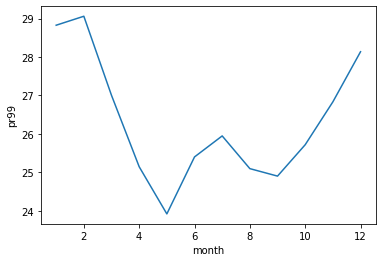

In [75]:
pr_percentileMonth.mean(dim='year').plot()
# mse_monthly = pr_percentile.groupby('time.month').mean(dim ='time').plot()

Text(0.5, 1.0, 'high percentile precipitation rate (97) by month')

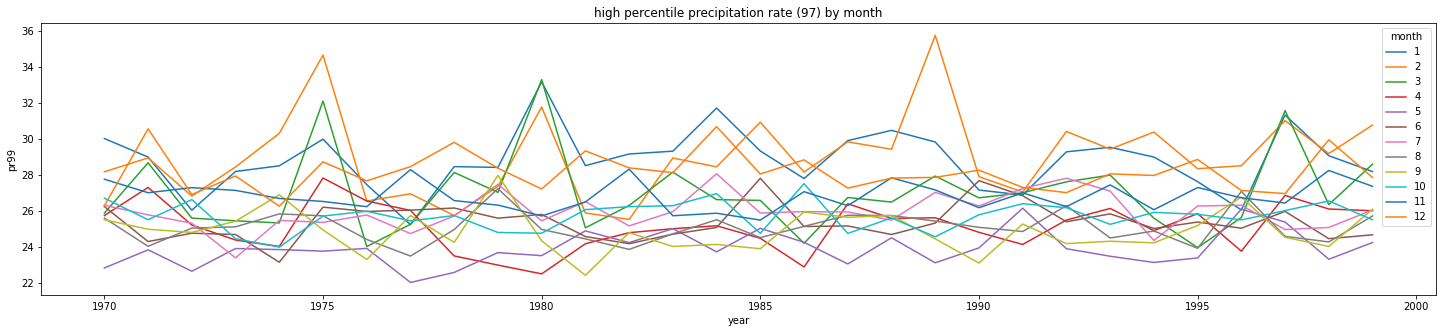

In [73]:
pr_percentileMonth.plot(x='year', hue='month', figsize=(25,5))
plt.title('high percentile precipitation rate ({}) by month'.format('97'))

In [69]:
# colors =['black', 'grey', 'red', 'darkred', 'green', 'darkgreen', 'cyan', 'blue', 'darkblue', 'darkviolet', 'pink']
# precip97_month.plot(x='year', hue='month', figsize=(25,5))
# plt.title('high percentile precipitation rate ({}) by month'.format('97'))

### saving